Datasets:- https://www.kaggle.com/datasets/mariospirito/position-salariescsv

# STEP 1: IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load DataSet

In [2]:
df = pd.read_csv("../Datasets/Position_Salaries.csv")

# STEP 3: Basic EDA

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
missing = df.isnull().sum()
print(missing)

Position    0
Level       0
Salary      0
dtype: int64


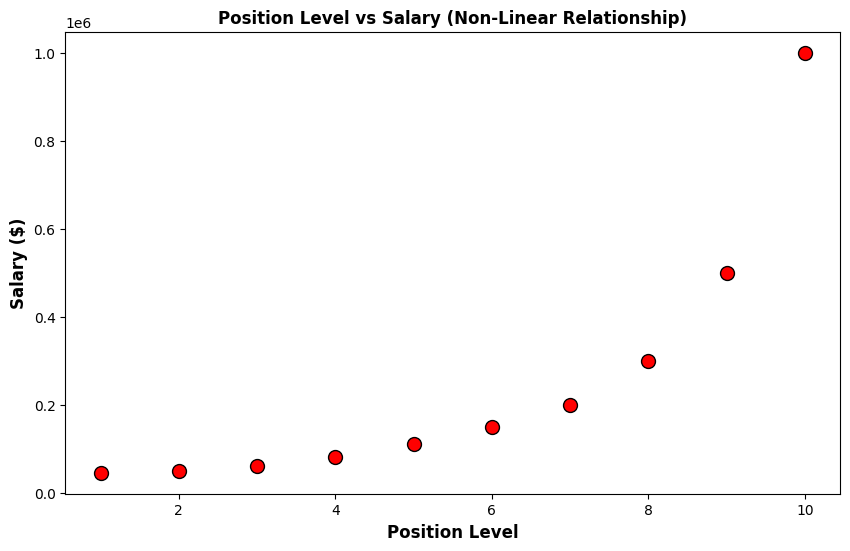

In [7]:
# Visulize the Data

plt.figure(figsize=(10,6))
plt.scatter(df['Level'], df['Salary'], color='red', s=100, edgecolor='black')
plt.xlabel('Position Level', fontweight="bold", fontsize=12)
plt.ylabel("Salary ($)", fontweight="bold", fontsize=12)
plt.title('Position Level vs Salary (Non-Linear Relationship)', fontweight='bold', fontsize=12)
plt.show()

# STEP 4: Prepare Data

In [8]:
# Features and target

X = df[['Level']].values    # Position level (independent variable)
y = df['Salary'].values     # Salary (dependent variable)


In [9]:
X.shape

(10, 1)

In [10]:
y.shape

(10,)

# STEP 5: Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# Train linear regression

linear_model = LinearRegression()
linear_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
# Prediction
y_pred_linear = linear_model.predict(X)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
# Evaluatation
linear_r2 = r2_score(y, y_pred_linear)
linear_mse = mean_squared_error(y, y_pred_linear)
linear_mae = mean_absolute_error(y, y_pred_linear)
linear_rmse = np.sqrt(mean_squared_error(y, y_pred_linear))

print(f"Linear R2 score: {linear_r2}")
print(f"Linear Mean Squared Error: {linear_mse}")
print(f"Linear Mean Absolute Error: {linear_mae}")
print(f"Linear RMSE: {linear_rmse}")

Linear R2 score: 0.6690412331929895
Linear Mean Squared Error: 26695878787.878784
Linear Mean Absolute Error: 128454.54545454546
Linear RMSE: 163388.73519272613


# STEP 6: POLYNOMIAL REGRESSION (DEGREE 2)

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
# Transform features to polynomial
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_features_2.fit_transform(X)

In [40]:
print(f"\nOriginal features: {X.shape}")
print(f"Polynomial features (degree 2): {X_poly_2.shape}")


Original features: (10, 1)
Polynomial features (degree 2): (10, 3)


In [41]:
# Train polynomial regression
poly_reg_2 = LinearRegression()
poly_reg_2.fit(X_poly_2, y)

# Predictions
y_pred_poly_2 = poly_reg_2.predict(X_poly_2)

In [42]:
# Evaluation
poly2_r2 = r2_score(y, y_pred_poly_2)
poly2_mae = mean_absolute_error(y, y_pred_poly_2)
poly2_rmse = np.sqrt(mean_squared_error(y, y_pred_poly_2))

print("\n--- Polynomial Regression (Degree 2) Results ---")
print(f"R² Score: {poly2_r2:.4f}")
print(f"MAE: ${poly2_mae:,.2f}")
print(f"RMSE: ${poly2_rmse:,.2f}")


--- Polynomial Regression (Degree 2) Results ---
R² Score: 0.9162
MAE: $70,218.18
RMSE: $82,212.12


# STEP 7: POLYNOMIAL REGRESSION (DEGREE 4)

In [43]:
# Transform features to polynomial degree 4
poly_features_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_features_4.fit_transform(X)

In [45]:
print(f"\nPolynomial features (degree 4): {X_poly_4.shape}")
print(f"Added polynomial terms: 1, X, X², X³, X⁴")


Polynomial features (degree 4): (10, 5)
Added polynomial terms: 1, X, X², X³, X⁴


In [46]:
# Train polynomial regression
poly_reg_4 = LinearRegression()
poly_reg_4.fit(X_poly_4, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
# Predictions
y_pred_poly_4 = poly_reg_4.predict(X_poly_4)

In [48]:
# Evaluation
poly4_r2 = r2_score(y, y_pred_poly_4)
poly4_mae = mean_absolute_error(y, y_pred_poly_4)
poly4_rmse = np.sqrt(mean_squared_error(y, y_pred_poly_4))

print("\n--- Polynomial Regression (Degree 4) Results ---")
print(f"R² Score: {poly4_r2:.4f}")
print(f"MAE: ${poly4_mae:,.2f}")
print(f"RMSE: ${poly4_rmse:,.2f}")


--- Polynomial Regression (Degree 4) Results ---
R² Score: 0.9974
MAE: $12,681.82
RMSE: $14,503.23


# STEP 8: SMOOTH CURVE VISUALIZATION

In [49]:
# Create smooth curve for visualization
X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_smooth_poly = poly_features_4.transform(X_smooth)
y_smooth_pred = poly_reg_4.predict(X_smooth_poly)

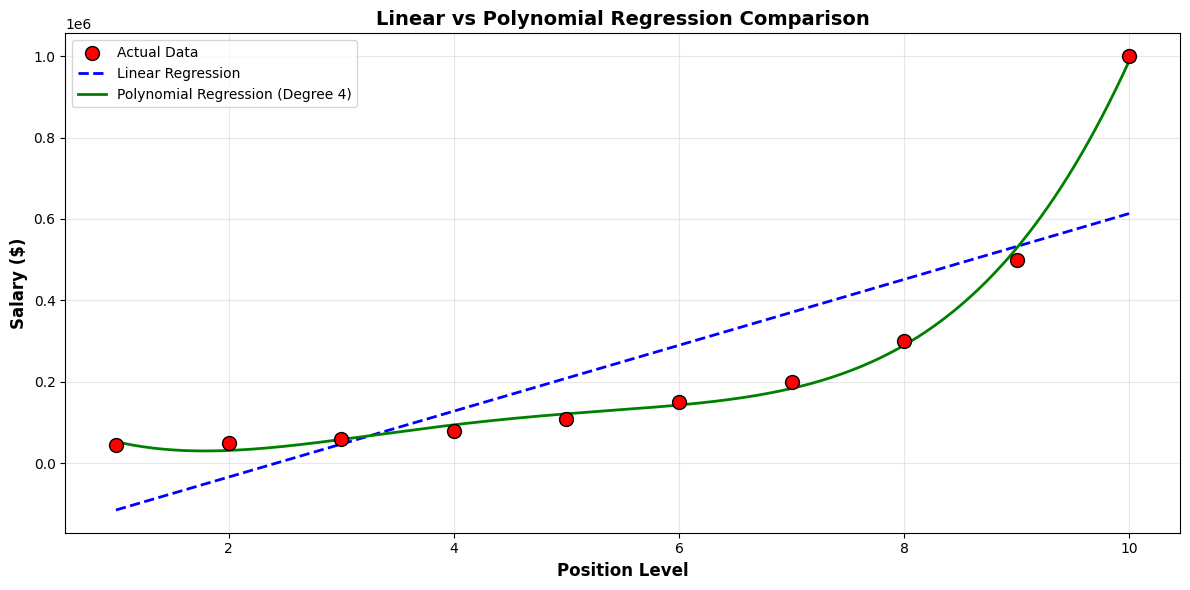

In [51]:
# Plot comparison
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='red', s=100, edgecolor='black', label='Actual Data', zorder=3)
plt.plot(X, y_pred_linear, color='blue', linewidth=2, label='Linear Regression', linestyle='--')
plt.plot(X_smooth, y_smooth_pred, color='green', linewidth=2, label='Polynomial Regression (Degree 4)')
plt.xlabel('Position Level', fontweight='bold', fontsize=12)
plt.ylabel('Salary ($)', fontweight='bold', fontsize=12)
plt.title('Linear vs Polynomial Regression Comparison', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# STEP 9: MODEL COMPARISON

In [53]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial (Degree 2)', 'Polynomial (Degree 4)'],
    'R² Score': [linear_r2, poly2_r2, poly4_r2],
    'MAE ($)': [linear_mae, poly2_mae, poly4_mae],
    'RMSE ($)': [linear_rmse, poly2_rmse, poly4_rmse]
})

print("\n")
print(comparison.to_string(index=False))

best_idx = comparison['R² Score'].idxmax()
print(f"\n✓ Best Model: {comparison.loc[best_idx, 'Model']}")
print(f"✓ R² Score: {comparison.loc[best_idx, 'R² Score']:.4f}")



                Model  R² Score       MAE ($)      RMSE ($)
    Linear Regression  0.669041 128454.545455 163388.735193
Polynomial (Degree 2)  0.916208  70218.181818  82212.124005
Polynomial (Degree 4)  0.997392  12681.818182  14503.234910

✓ Best Model: Polynomial (Degree 4)
✓ R² Score: 0.9974
